# Disk IO Preprocessing

In [23]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

set_option('display.max_columns', 50)

In [24]:
df = read_csv('diskio.csv', header=0)
df.head()

,@timestamp,system.diskio.iostat.await,system.diskio.iostat.busy,system.diskio.iostat.queue.avg_size,system.diskio.iostat.request.avg_size,system.diskio.iostat.service_time,system.diskio.iostat.read.request.per_sec,system.diskio.iostat.read.per_sec.bytes,system.diskio.iostat.read.request.merges_per_sec,system.diskio.iostat.write.request.per_sec,system.diskio.iostat.write.per_sec.bytes,system.diskio.iostat.write.request.merges_per_sec
0,"September 28th 2018, 09:37:39.042",0.000,0.000,0.000,0,0.000,0.000,0B,0,0.000,0B,0.000
1,"September 28th 2018, 09:38:39.123",9.633,4.162,0.086,"7,624.39",4.659,1.790,15.991KB,0,7.143,50.516KB,4.868
2,"September 28th 2018, 09:39:39.123",4.283,0.597,0.008,"15,151.575",3.150,0.017,68.679B,0,1.878,27.968KB,1.157
3,"September 28th 2018, 09:40:39.123",34.667,0.642,0.059,"21,724.863",3.765,0.017,684.95B,0,1.689,35.518KB,0.803
4,"September 28th 2018, 09:41:39.123",6.174,0.638,0.010,"38,778.435",4.130,0.000,0B,0,1.544,58.478KB,0.873


## Remove B KB MB GB

In [25]:
for i in range(1, df.shape[1]):
    selected_col = df.iloc[:, i]
    col_type = type(selected_col[0])
    
    if(col_type == str):
        df.iloc[:, i] = df.iloc[:, i].str.replace(',', '')
        
        if(selected_col.iloc[0].endswith('B') != -1):
            for index, row in DataFrame(df.iloc[:, i]).iterrows():
                if (row.values[0].find("GB") != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('GB','').replace(',',''))*1000000000
                    
                if (row.values[0].find("MB") != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('MB','').replace(',',''))*1000000
                    
                elif (row.values[0].find("KB") != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('KB','').replace(',',''))*1000
                
                elif (row.values[0].find("B") != -1):
                    df.iloc[[index],[i]] = float(row.values[0].replace('B','').replace(',',''))
        else:
            df.iloc[:, i] = df.iloc[:, i].str.astype('float')

df.head()

,@timestamp,system.diskio.iostat.await,system.diskio.iostat.busy,system.diskio.iostat.queue.avg_size,system.diskio.iostat.request.avg_size,system.diskio.iostat.service_time,system.diskio.iostat.read.request.per_sec,system.diskio.iostat.read.per_sec.bytes,system.diskio.iostat.read.request.merges_per_sec,system.diskio.iostat.write.request.per_sec,system.diskio.iostat.write.per_sec.bytes,system.diskio.iostat.write.request.merges_per_sec
0,"September 28th 2018, 09:37:39.042",0.000,0.000,0.000,0,0.000,0.000,0,0,0.000,0,0.000
1,"September 28th 2018, 09:38:39.123",9.633,4.162,0.086,7624.39,4.659,1.790,15991,0,7.143,50516,4.868
2,"September 28th 2018, 09:39:39.123",4.283,0.597,0.008,15151.575,3.150,0.017,68.679,0,1.878,27968,1.157
3,"September 28th 2018, 09:40:39.123",34.667,0.642,0.059,21724.863,3.765,0.017,684.95,0,1.689,35518,0.803
4,"September 28th 2018, 09:41:39.123",6.174,0.638,0.010,38778.435,4.130,0.000,0,0,1.544,58478,0.873


In [26]:
df.to_csv("diskio-cleaned.csv");

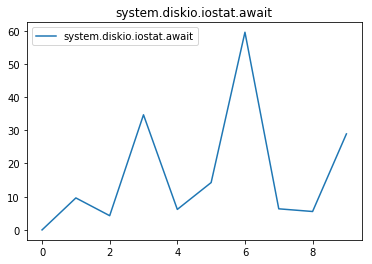

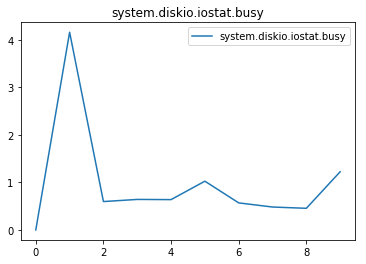

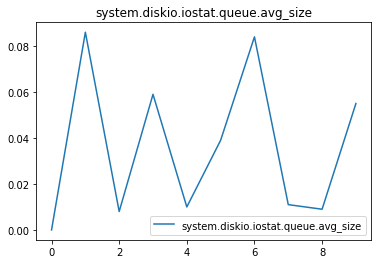

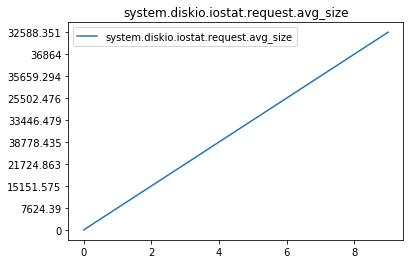

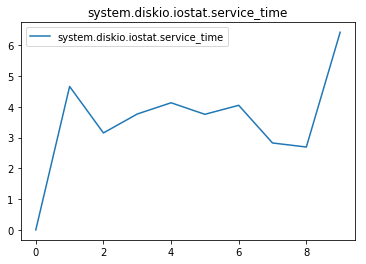

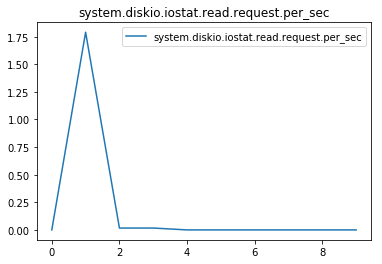

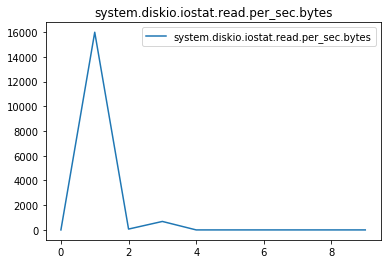

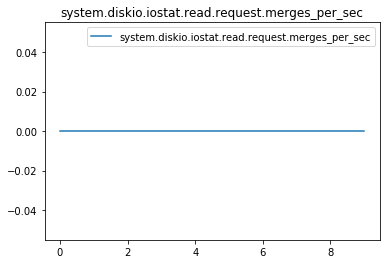

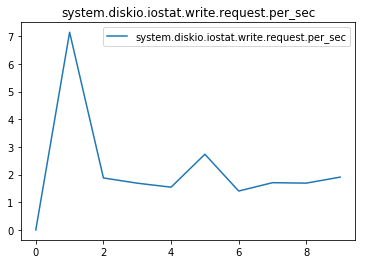

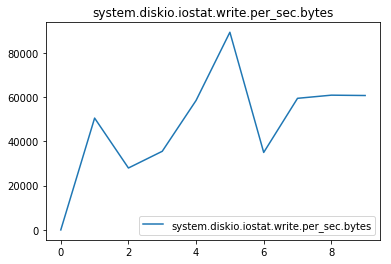

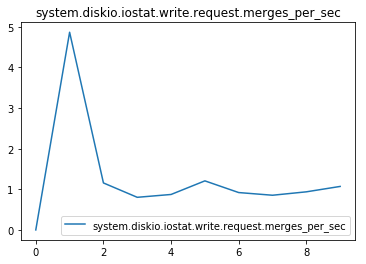

In [27]:
for i in range(1, df.shape[1]):
    pyplot.plot(df[df.columns[i]], label=df.columns[i])
    pyplot.legend()
    pyplot.title(df.columns[i])
    pyplot.show()